<h1><center>Quantum Teleportation protocol</center></h1>

<p><center>Alice owns two qubits</center></p>
<p><center>qubit (1) belongs to Alice and her alone:</center></p>
$$ \color{magenta}{\ket{\Psi} = \alpha \ket{0} + \beta \ket{1}} \\$$
<p><center>qubit (2) is entangled with Bob's. They are in the $\ket{\Phi+}$ Bell state:</center></p>

$$\\ \color{blue}{\ket{\Psi} = \alpha \ket{00} + \beta \ket{11}} $$
<p><center>We may represent our initial state in the following manner</center></p>
$${\ket{\Psi}} = \frac{1}{\sqrt{2}}                                   [\alpha\color{magenta}{\ket{0}} \color{blue}{(\ket{00} + \ket{11})}       + \beta \color{magenta}{\ket{1}} \color{blue}{(\ket{00}+\ket{11})}]$$

In [58]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np

In [59]:
#three different qubits
q_reg = QuantumRegister(3, name="q")

#Two classical bits to represent our qubits' measurements. 
c_reg_x = ClassicalRegister(1, name="crx")
c_reg_z = ClassicalRegister(1, name="crz")

#initialize quantum circuit 
circuit = QuantumCircuit(q_reg, c_reg_x, c_reg_z)

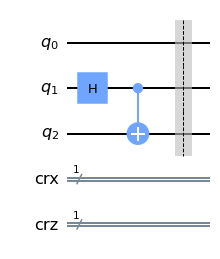

In [60]:
#Create the entangled bell pair state between Alice's second and Bob's only qubit
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()


circuit.draw('mpl')

<p><center>We will now employ the CNOT gate from Alice's first qubit unto her second</center></p>
<p><center>This will result in the following state</center></p>
$${\ket{\Psi}} = \frac{1}{\sqrt{2}}                                   [\alpha\color{magenta}{\ket{0}} \color{blue}{(\ket{00} + \ket{11})}       + \beta \color{magenta}{\ket{1}} \color{blue}{(\ket{10}+\ket{01})}]$$

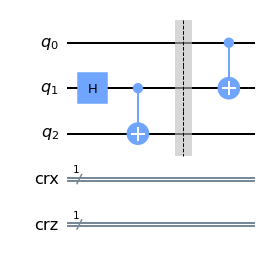

In [61]:
circuit.cx(0,1)
circuit.draw('mpl')

<p><center>In order to entirely map Alice's initial state unto Bob's, we must measure the first qbit in the $+/-$ basis. We do this by applying a Hadmard transform, then measuring in the standard basis. This will later be used to capture Alice's phase state and teleport it to Bob.</center></p>
<p><center>From this, we will obtain:</center></p>
$${\ket{\Psi}} = \frac{1}{\sqrt{2}}                                   [\alpha\color{magenta}{(\ket{0} + \ket{1})} \color{blue}{(\ket{00} + \ket{11})} + \beta \color{magenta}{(\ket{0} - \ket{1})} \color{blue}{(\ket{10}+\ket{01})}]$$

<p><center>If we re-write this in the following manner by regrouping terms (Note we are taking tensor products, not algebraically multiplying out the states). </center></p>
$$\ket{\Psi} = \frac{1}{2}                                    [\color{blue}{\ket{00}}(\alpha\color{\magenta}{\ket{0}}                  +\beta\color{magenta}{\ket{1}})                                           + \color{blue}{\ket{01}}(\alpha\color{\magenta}{\ket{1}}                 +\beta\color{magenta}{\ket{0}})                                           + \color{blue}{\ket{10}}(\alpha\color{\magenta}{\ket{0}}                  -\beta\color{magenta}{\ket{1}})                                           + \color{blue}{\ket{11}}(\alpha\color{\magenta}{\ket{1}}                  -\beta\color{magenta}{\ket{0}})]                                         $$ 

 <p><center>Moving forward, Bob's only qubit will be highlighted blue and both of Alice's will be magenta</center></p>
 <p><center>This leaves us with four possible states for Bob's qubit:</center></p>
$$\color{magenta}{00} \equiv \color{blue}{\alpha\ket{0} + \beta\ket{1}}$$
$$\color{magenta}{01} \equiv \color{blue}{\alpha\ket{1} + \beta\ket{0}}$$
$$\color{magenta}{10} \equiv \color{blue}{\alpha\ket{0} - \beta\ket{1}}$$
$$\color{magenta}{11} \equiv \color{blue}{\alpha\ket{1} - \beta\ket{0}}$$

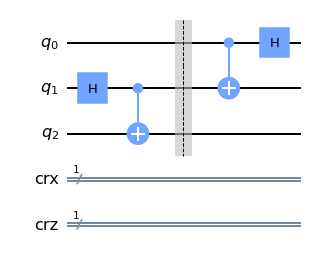

In [62]:
circuit.h(0)
circuit.draw('mpl')

<p><center>The four possible states for Alice are used to determine what gate must be applied to Bob's qubit in order for it to recover Alice's original $\ket{\Psi}$</center></p>
<p><center>$\color{magenta}{00}$ : Do nothing<br>$\color{magenta}{01}$ : Apply X gate<br>$\color{magenta}{10}$ : Apply Z gate<br>$\color{magenta}{11}$ : Apply X gate then Apply Z gate</center></p>

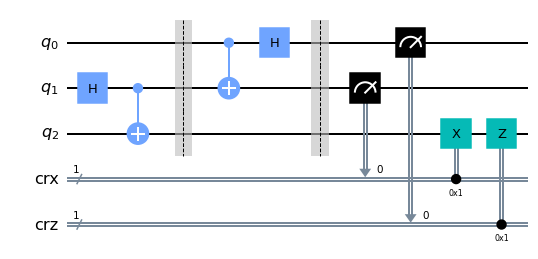

In [63]:
#we will measure the qubits and map their results unto the classical registers previously defined
circuit.barrier()
circuit.measure([1,0], [0,1])

#The following methods are used to control qubits based on the results of a classical bit
circuit.x(2).c_if(c_reg_x,1)
circuit.z(2).c_if(c_reg_z,1)

circuit.draw('mpl')

<p>We have successfully mapped Alice's initial qubit $q_{0}$ to Bob's $q_{2}$!</p>